**Homeworks – Statistical learning, 2021/22. semester I.**

*Week 1*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot

# Exercise a)

## Problem

![img/week1a.png](img/week1a.png)

## Solution

In [2]:
#--------------
np.random.seed(1)
x1 = np.random.rand(100)
x2 = 0.5*x1 + np.random.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100) 
data = pd.DataFrame(dict(x1=x1, x2=x2, y=y))
#--------------

In [3]:
data.head()

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498


The linear model:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$

where the regression coefficients are
- $\beta_0=2$ for the `intercept`,
- $\beta_1=2$ for variable $x_1$,
- $\beta_2=0.3$ for variable $x_2$.

and the error term
- $\epsilon \sim \mathcal{N}(0,1)$

In [4]:
# extract the real regression coefficients
b0, b1, b2 = (2, 2, 0.3)

# Exercise b)

## Problem

![img/week1b.png](img/week1b.png)

## Solution

To visualize the correlations we use the `df.corr()` method and the `seaborn.heatmap()` function.

          x1        x2         y
x1  1.000000  0.839060  0.473077
x2  0.839060  1.000000  0.501172
y   0.473077  0.501172  1.000000


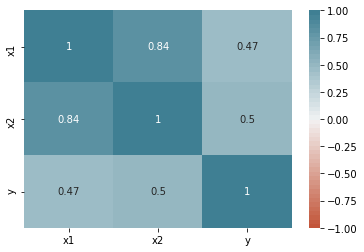

The correlation between x1 and x2 is 0.839.


In [5]:
# print the correlation matrix
print(data.corr())

# visualize the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=20,h_pos=220,n=50))
plt.show()

# extract the correlation between x1 and x2
print(f'The correlation between x1 and x2 is {data.corr().values[0,1]:.3f}.')

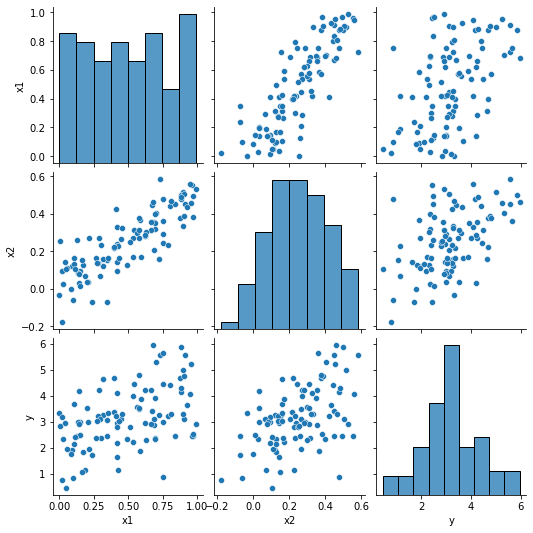

In [6]:
# scatterplot in the off-diagonals displaying the relatinship between the variables
sns.pairplot(data)
plt.show()

# Exercise c)

## Problem

![img/week1c.png](img/week1c.png)

## Solution

In [7]:
model = smf.ols('y ~ x1+x2', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.40e-07
Time:                        13:32:50   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

In [8]:
# relation between the true and estimated coefficients
{'Intercept': {'estimated value': model.params[0], 'true value': b0},
       'x1': {'estimated value': model.params[1], 'true value': b1},
       'x2': {'estimated value': model.params[2], 'true value': b2}}

{'Intercept': {'estimated value': 2.189284397624821, 'true value': 2},
 'x1': {'estimated value': 0.7046285363120242, 'true value': 2},
 'x2': {'estimated value': 2.5024049586730523, 'true value': 0.3}}

In [9]:
print('Hypothesis test for beta_i = 0:\n')
print((model.pvalues < 0.05).replace({True: 'reject H0', False: 'accept H0'}))

Hypothesis test for beta_i = 0:

Intercept    reject H0
x1           accept H0
x2           reject H0
dtype: object


- $H_0: \beta_1=0$: as the p-value for $\beta_1$ is above $5\%$ we can *accept* the null hypothesis
- $H_0: \beta_2=0$: as the p-value for $\beta_2$ is below $5\%$ we can *reject* the null hypothesis

# Exercise d)

## Problem

![img/week1d.png](img/week1d.png)

## Solution

In [10]:
model = smf.ols('y ~ x1', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           6.68e-07
Time:                        13:32:50   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

In [11]:
print('Hypothesis test for beta_i = 0:\n')
print((model.pvalues < 0.05).replace({True: 'reject H0', False: 'accept H0'}))

Hypothesis test for beta_i = 0:

Intercept    reject H0
x1           reject H0
dtype: object


- $H_0: \beta_1=0$: as the p-value for $\beta_1$ is below $5\%$ we can *reject* the null hypothesis

# Exercise e)

## Problem

![img/week1e.png](img/week1e.png)

## Solution

In [12]:
model = smf.ols('y ~ x2', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.09e-07
Time:                        13:32:50   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

In [13]:
print('Hypothesis test for beta_i = 0:\n')
print((model.pvalues < 0.05).replace({True: 'reject H0', False: 'accept H0'}))

Hypothesis test for beta_i = 0:

Intercept    reject H0
x2           reject H0
dtype: object


- $H_0: \beta_2=0$: as the p-value for $\beta_2$ is below $5\%$ we can *reject* the null hypothesis

# Exercise f)

## Problem

![img/week1f.png](img/week1f.png)

## Solution

There is no contradiction. When using a simple (univariate) linear regression either the $x_1$ or $x_2$ is statistically significant. However, when they are both included in the model it is hard to distingush their individual affect on the target variable $y$ due to the high correlation between $x_1$ and $x_2$.  

# Exercise g)

## Problem

![img/week1g.png](img/week1g.png)

## Solution

In [14]:
#--------------
new_data = data.append(dict(x1=0.1, x2=0.8, y=6), 
                       ignore_index=True)
#--------------

In [15]:
new_data

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498
...,...,...,...
96,0.903380,0.386998,4.758863
97,0.573679,0.376988,4.803815
98,0.002870,0.254268,2.840827
99,0.617145,0.283709,4.204311


### $x_1$ and $x_2$

In [16]:
model = smf.ols('y ~ x1+x2', data=data).fit()
model_new = smf.ols('y ~ x1+x2', data=new_data).fit()

The original model:

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.40e-07
Time:                        13:32:50   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

Model re-run with the new data:

In [18]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           5.51e-08
Time:                        13:32:50   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.0

The conclusion is the same, $x_1$ is statistically insignificant just as without the mis-measured observation and $x_2$ is significant.

However, by looking at the leverage we can see that the new observation (index: 100) is has a big influence.

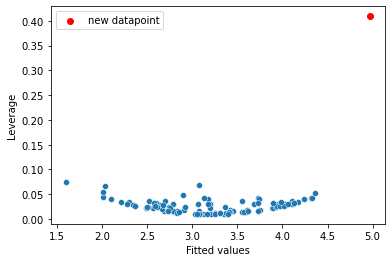

In [19]:
sns.scatterplot(x=model_new.fittedvalues, y=model_new.get_influence().summary_frame()['hat_diag'])
plt.scatter(x=model_new.fittedvalues.loc[100], y=model_new.get_influence().summary_frame()['hat_diag'].loc[100],
            color='red', label='new datapoint')
plt.xlabel('Fitted values')
plt.ylabel('Leverage')
plt.legend()
plt.show()

The studentized residual of the new point does not fall far from the usual cut-off value (`abs(3)`).

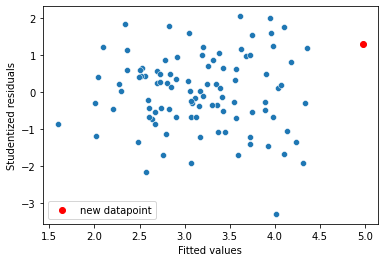

In [20]:
sns.scatterplot(x=model_new.fittedvalues, y=model_new.get_influence().summary_frame()['student_resid'])
plt.scatter(x=model_new.fittedvalues.loc[100], y=model_new.get_influence().summary_frame()['student_resid'].loc[100],
            color='red', label='new datapoint')
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.legend()
plt.show()

### only $x_1$

In [21]:
model = smf.ols('y ~ x1', data=data).fit()
model_new = smf.ols('y ~ x1', data=new_data).fit()

The original model:

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           6.68e-07
Time:                        13:32:51   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

Re-run model on new data:

In [23]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           9.15e-06
Time:                        13:32:51   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.0

In this case it is easy to visualize the effect.

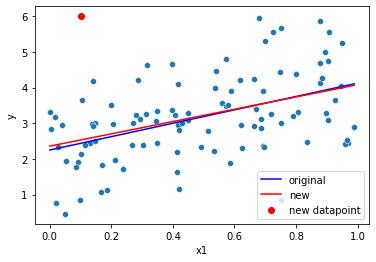

In [24]:
b0, b1 = model.params
b0_new, b1_new = model_new.params

sns.scatterplot(x='x1', y='y', data=new_data)
plt.scatter(x=new_data.iloc[-1]['x1'], y=new_data.iloc[-1]['y'], color='red', label='new datapoint')
sns.lineplot(x=x1,y=b0+b1*x1, label='original', color='blue')
sns.lineplot(x=x1,y=b0_new+b1_new*x1, label='new', color='red')
plt.legend()
plt.show()

We can see from the plot that the new datapoint clearly falls outside of the range of other observations. Also, it had a slight affect on the slope. From this we expect this to be an outlier, but not a high leverage point.

This is confirmed when we observe the high value of the studentized residual for the new datapoint (with index: 100).

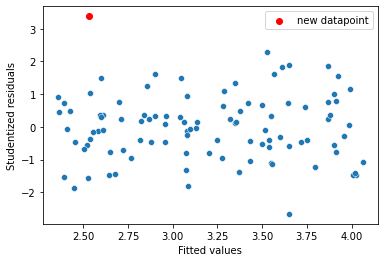

In [25]:
sns.scatterplot(x=model_new.fittedvalues, y=model_new.get_influence().summary_frame()['student_resid'])
plt.scatter(x=model_new.fittedvalues.loc[100], y=model_new.get_influence().summary_frame()['student_resid'].loc[100],
            color='red', label='new datapoint')
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.legend()
plt.show()

However, looking at the leverage we can observe that the new observation does not have a significantly larger influence than other observations.

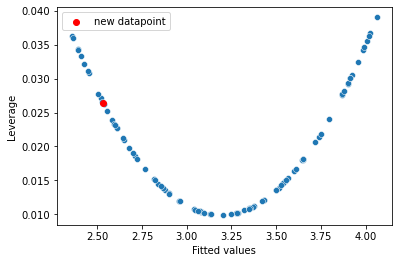

In [26]:
sns.scatterplot(x=model_new.fittedvalues, y=model_new.get_influence().summary_frame()['hat_diag'])
plt.scatter(x=model_new.fittedvalues.loc[100], y=model_new.get_influence().summary_frame()['hat_diag'].loc[100],
            color='red', label='new datapoint')
plt.xlabel('Fitted values')
plt.ylabel('Leverage')
plt.legend()
plt.show()

### only $x_2$

In [27]:
model = smf.ols('y ~ x2', data=data).fit()
model_new = smf.ols('y ~ x2', data=new_data).fit()

The original model:

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.09e-07
Time:                        13:32:53   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

The model with the new data:

In [29]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           7.41e-09
Time:                        13:32:53   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.0

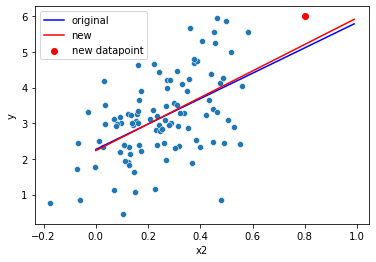

In [30]:
b0, b1 = model.params
b0_new, b1_new = model_new.params

sns.scatterplot(x='x2', y='y', data=new_data)
plt.scatter(x=new_data.iloc[-1]['x2'], y=new_data.iloc[-1]['y'], color='red', label='new datapoint')
sns.lineplot(x=x1,y=b0+b1*x1, label='original', color='blue')
sns.lineplot(x=x1,y=b0_new+b1_new*x1, label='new', color='red')
plt.legend()
plt.show()

Looking at the leverage we can see that the new observation (index: 100) is has a big influence.

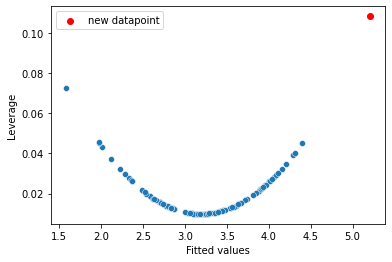

In [31]:
sns.scatterplot(x=model_new.fittedvalues, y=model_new.get_influence().summary_frame()['hat_diag'])
plt.scatter(x=model_new.fittedvalues.loc[100], y=model_new.get_influence().summary_frame()['hat_diag'].loc[100],
            color='red', label='new datapoint')
plt.xlabel('Fitted values')
plt.ylabel('Leverage')
plt.legend()
plt.show()

The studentized residual of the new point does not fall far from the usual cut-off value (`abs(3)`).

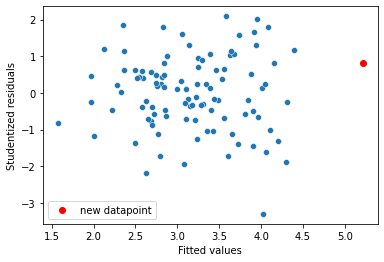

In [32]:
sns.scatterplot(x=model_new.fittedvalues, y=model_new.get_influence().summary_frame()['student_resid'])
plt.scatter(x=model_new.fittedvalues.loc[100], y=model_new.get_influence().summary_frame()['student_resid'].loc[100],
            color='red', label='new datapoint')
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.legend()
plt.show()